
## Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.
#####[Ans]
### Concept:
Clustering is an unsupervised machine learning technique used to group similar data points into clusters based on their inherent characteristics. The goal is to maximize intra-cluster similarity and minimize inter-cluster similarity.

### Applications:
1. **Customer Segmentation**:
   - Grouping customers based on purchasing behavior for targeted marketing.
   
2. **Image Segmentation**:
   - Dividing an image into regions for object detection.
   
3. **Document Clustering**:
   - Organizing documents into topics for search optimization.
   
4. **Anomaly Detection**:
   - Identifying fraudulent transactions in finance or unusual patterns in network security.

---

## Q2. What is DBSCAN and how does it differ from other clustering algorithms such as K-Means and hierarchical clustering?
#####[Ans]
### Definition:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that identifies clusters as regions of high density separated by regions of low density.

### Differences:
1. **Cluster Shape**:
   - DBSCAN can detect clusters of arbitrary shapes, while K-Means assumes spherical clusters.
   
2. **Outliers**:
   - DBSCAN explicitly identifies noise (outliers), whereas K-Means does not.
   
3. **Parameters**:
   - DBSCAN uses `epsilon (ε)` (distance threshold) and `minPts` (minimum points in a neighborhood), unlike K-Means, which requires the number of clusters (K).

4. **Hierarchy**:
   - Hierarchical clustering builds a tree structure, while DBSCAN directly assigns points to clusters or labels them as noise.

---

## Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?
#####[Ans]
### Methods:
1. **K-Distance Plot**:
   - Plot the distance to the k-th nearest neighbor for each point (k = minPts). Identify the "elbow" point as the optimal ε.

2. **Domain Knowledge**:
   - Use knowledge about the dataset to estimate the density of clusters and select `ε` and `minPts`.

3. **Grid Search**:
   - Experiment with different combinations of `ε` and `minPts` and evaluate the clustering performance.

---

## Q4. How does DBSCAN clustering handle outliers in a dataset?
#####[Ans]
### Approach:
- DBSCAN labels points as **noise** if they do not meet the density criteria (i.e., they are not core points or reachable from a core point).
- Outliers remain unclustered, making DBSCAN effective for detecting anomalies.

---

## Q5. How does DBSCAN clustering differ from K-Means clustering?
#####[Ans]
### Key Differences:
| Feature               | DBSCAN                           | K-Means                          |
|-----------------------|----------------------------------|----------------------------------|
| **Cluster Shape**     | Arbitrary                       | Spherical                       |
| **Outliers**          | Explicitly labeled as noise     | Not explicitly handled          |
| **Number of Clusters**| Not required                    | Must specify `K`                |
| **Parameter Tuning**  | ε, minPts                       | Number of clusters              |
| **Density Sensitivity**| Handles varying densities       | Struggles with varying densities|

---

## Q6. Can DBSCAN clustering be applied to datasets with high-dimensional feature spaces? If so, what are some potential challenges?
#####[Ans]
### Application:
- Yes, DBSCAN can be applied to high-dimensional datasets.

### Challenges:
1. **Curse of Dimensionality**:
   - Distance metrics like Euclidean become less meaningful in high dimensions.
   
2. **Parameter Sensitivity**:
   - Choosing appropriate `ε` and `minPts` becomes harder as dimensionality increases.

3. **Computational Cost**:
   - DBSCAN's computational complexity can increase with the number of dimensions.

---

## Q7. How does DBSCAN clustering handle clusters with varying densities?
#####[Ans]
- DBSCAN struggles with clusters of varying densities because a single `ε` and `minPts` may not capture all clusters effectively.
- Alternative methods, like **HDBSCAN (Hierarchical DBSCAN)**, are designed to handle varying densities better.

---

## Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?
#####[Ans]
### Metrics:
1. **Silhouette Score**:
   - Measures how similar points are within a cluster compared to other clusters.

2. **Davies-Bouldin Index**:
   - Evaluates the ratio of intra-cluster and inter-cluster distances.

3. **Adjusted Rand Index (ARI)**:
   - Compares clustering results with ground truth labels.

4. **V-Measure**:
   - Evaluates homogeneity and completeness of clusters.

---

## Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?
#####[Ans]
### Answer:
- While DBSCAN is primarily unsupervised, it can assist in semi-supervised learning by:
  1. Labeling dense regions as clusters.
  2. Identifying outliers or anomalies for further analysis.
  3. Serving as a preprocessing step to reduce the dataset size for supervised learning.

---

## Q10. How does DBSCAN clustering handle datasets with noise or missing values?
#####[Ans]
### Noise:
- DBSCAN naturally identifies noise points and excludes them from clusters.

### Missing Values:
- Requires preprocessing to handle missing values, such as:
  1. **Imputation**: Fill missing values with mean, median, or other strategies.
  2. **Distance Adjustment**: Modify distance metrics to account for missing data.
---

## Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.
#####[Ans]




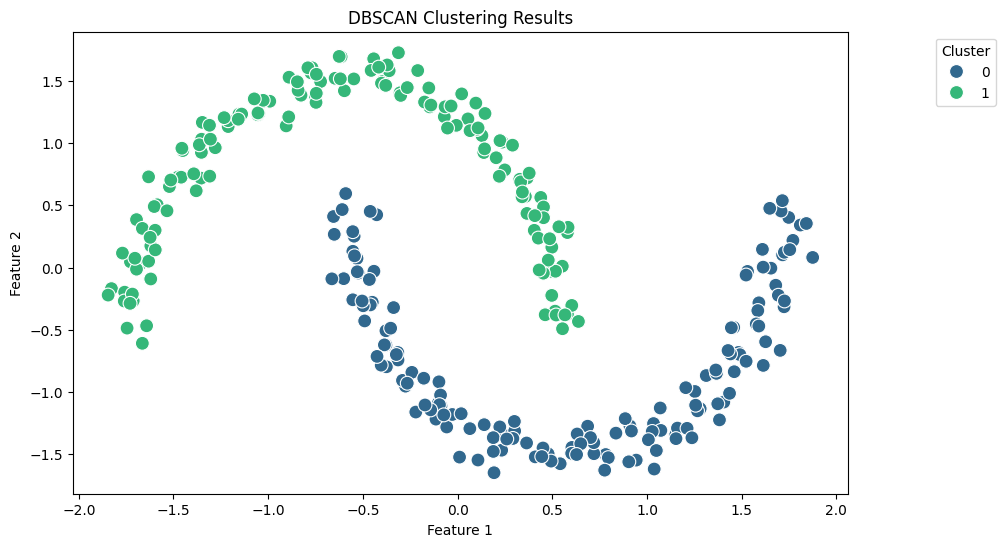

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster, palette='viridis', s=100)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

In [5]:
num_cluster = len(set(cluster)) - (1 if -1 in cluster else 0)
num_noise = list(cluster).count(-1)

print(f"Number of clusters formed: {num_cluster}")
print(f"Number of noise points: {num_noise}")

Number of clusters formed: 2
Number of noise points: 0
